# Loading the Dataset

The data contains 2 columns, *Text* and *Sentiment*. *Text* is the actual review comment and *Sentiment* is a 1 or 0 for positive and negative sentiments respectively.

In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv('umich-movie-sentiment-train.txt', delimiter = '\t')
train_df.head()

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


In [3]:
pd.set_option('max_colwidth', 800)
train_df.head()

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,"this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this."
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.


In [4]:
train_df[train_df['sentiment'] == 1].head()

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,"this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this."
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.


In [5]:
train_df[train_df['sentiment'] == 0].head()

,sentiment,text
3943,0,da vinci code was a terrible movie.
3944,0,"Then again, the Da Vinci code is super shitty movie, and it made like 700 million."
3945,0,"The Da Vinci Code comes out tomorrow, which sucks."
3946,0,i thought the da vinci code movie was really boring.
3947,0,"God, Yahoo Games has this truly-awful looking Da Vinci Code-themed skin on it's chessboard right now."


# Exploration of the Dataset

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6918 entries, 0 to 6917
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  6918 non-null   int64 
 1   text       6918 non-null   object
dtypes: int64(1), object(1)
memory usage: 108.2+ KB


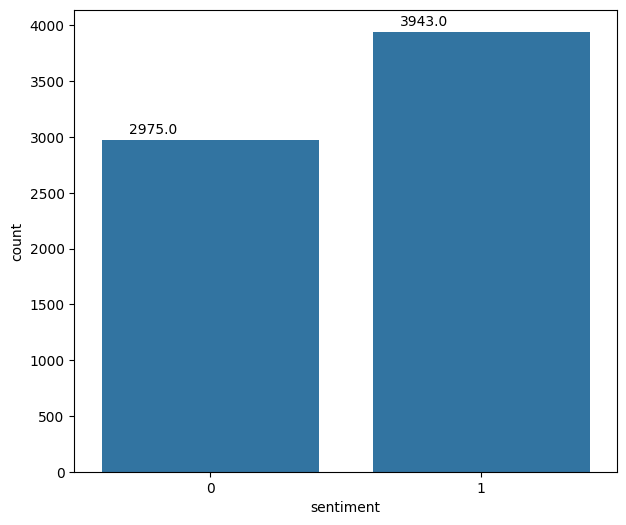

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (7,6))

ax = sns.countplot(x = 'sentiment', data = train_df)
# annotate
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x() + 0.1, p.get_height() + 50))

# Text Preprocessing

In [8]:
# creating a vocabulary for the dataset

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
feature_vector = cv.fit(train_df['text'])

features = cv.get_feature_names_out()
print(f"Total length of vocabulary is {len(features)}, examples are {features[:5]}")

Total length of vocabulary is 2132, examples are ['00' '007' '10' '10pm' '12']


In [9]:
# transforming the text into numerical format using transform method
train_df_features = cv.transform(train_df['text'])
train_df_features

<6918x2132 sparse matrix of type '<class 'numpy.int64'>'
	with 65398 stored elements in Compressed Sparse Row format>

In [10]:
train_df_features.getnnz()

65398

In [11]:
train_df_features.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [12]:
train_df2 = pd.DataFrame(train_df_features.todense(), columns = features)
train_df2.head()

,00,007,10,10pm,12,16,17,1984,1st,200,...,yip,you,young,younger,your,yuck,yuh,zach,zen,µª
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
train_df2.iloc[0:2, 150:158]

,away,awesome,awesomely,awesomeness,awesomest,awful,awkward,axes
0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0


In [14]:
train_df.head(2)

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,"this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this."


Going to remove the words with low frequency for efficient processing of the data

Text(0, 0.5, 'Density')

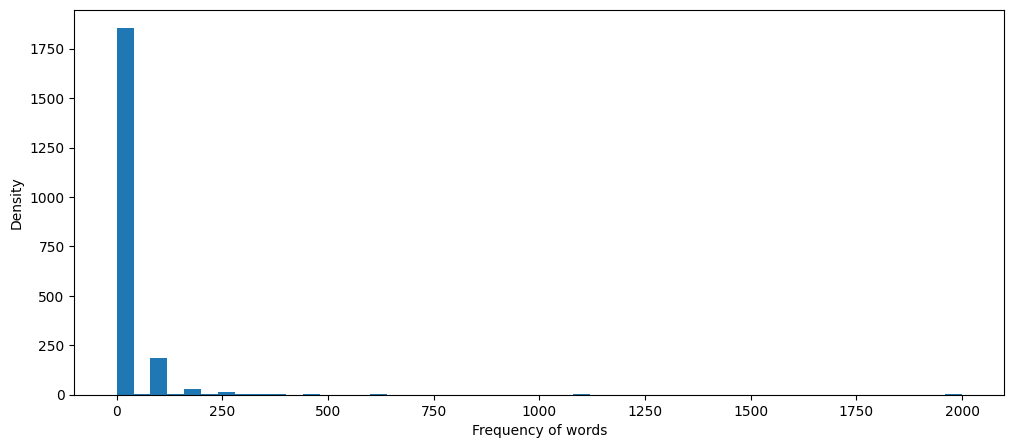

In [15]:
feature_count = np.sum(train_df_features.toarray(), axis = 0)
feature_count_df = pd.DataFrame(dict(features = features,
                                     counts = feature_count))

plt.figure(figsize = (12,5))
plt.hist(feature_count_df.counts, bins = 50, range = (0,2000))
plt.xlabel('Frequency of words')
plt.ylabel('Density')

In [16]:
# number of features (words) which are present only once in the dataset and we can ignore them
feature_count_df[feature_count_df['counts'] == 1]

,features,counts
0,00,1
1,007,1
3,10pm,1
4,12,1
5,16,1
...,...,...
2125,younger,1
2127,yuck,1
2128,yuh,1
2129,zach,1


In [17]:
# reducing the vocabulary

cv = CountVectorizer(max_features = 1000)
feature_vector = cv.fit(train_df['text'])

features = cv.get_feature_names_out()
print(f"Total length of vocabulary is {len(features)}, examples are {features[:5]}")

train_df_features = cv.transform(train_df['text'])

feature_count = np.sum(train_df_features.toarray(), axis = 0)
feature_count_df = pd.DataFrame(dict(features = features,
                                     counts = feature_count))

feature_count_df.sort_values('counts', ascending = False).head(10)

Total length of vocabulary is 1000, examples are ['10' '17' '33' '6th' 'aaron']


,features,counts
866,the,3306
37,and,2154
358,harry,2093
675,potter,2093
138,code,2002
934,vinci,2001
178,da,2001
528,mountain,2000
104,brokeback,2000
488,love,1624


# Remving the Stop Words

In [18]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as my_stop_words
my_stop_words

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [19]:
# adding my own words to the list of stop words
my_stop_words = my_stop_words.union(['harry', 'potter', 'code', 'da', 'vinci', 'mountain'])

In [20]:
cv = CountVectorizer(max_features = 1000, stop_words = list(my_stop_words))
feature_vector = cv.fit(train_df['text'])

features = cv.get_feature_names_out()
print(f"Total length of vocabulary is {len(features)}, examples are {features[:5]}")

train_df_features = cv.transform(train_df['text'])

feature_count = np.sum(train_df_features.toarray(), axis = 0)
feature_count_df = pd.DataFrame(dict(features = features,
                                     counts = feature_count))

feature_count_df.sort_values('counts', ascending = False).head(10)

Total length of vocabulary is 1000, examples are ['00' '10' '17' '33' '6th']


,features,counts
73,brokeback,2000
408,love,1624
39,awesome,1127
436,mission,1094
341,impossible,1093
390,like,974
442,movie,783
746,sucks,602
744,sucked,600
297,hate,578


# Stemming and Lemmitization
To convert the words with similar meanings to their root form

In [21]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

analyzer = CountVectorizer().build_analyzer()

def stem_words(doc):
  stemmed_words = [stemmer.stem(w) for w in analyzer(doc)]
  non_stop_words = [word for word in list(set(stemmed_words) - set(my_stop_words))]
  return non_stop_words

In [22]:
cv = CountVectorizer(max_features = 1000, analyzer = stem_words)
feature_vector = cv.fit(train_df['text'])

features = cv.get_feature_names_out()
print(f"Total length of vocabulary is {len(features)}, examples are {features[:5]}")

train_df_features = cv.transform(train_df['text'])

feature_count = np.sum(train_df_features.toarray(), axis = 0)
feature_count_df = pd.DataFrame(dict(features = features,
                                     counts = feature_count))

feature_count_df.sort_values('counts', ascending = False).head(10)

Total length of vocabulary is 1000, examples are ['10' '17' '33' '6th' 'abl']


,features,counts
80,brokeback,1930
297,harri,1916
407,love,1837
803,suck,1378
922,wa,1142
43,awesom,1116
345,imposs,1090
433,mission,1090
439,movi,1052
393,like,823


# Distribution of words across various sentiments

In [23]:
train_df3 = pd.DataFrame(train_df_features.todense(), columns = features)
train_df3['sentiment'] = train_df['sentiment']

Checking if the word (y) appears in the positive (1) or the negative (0) sentiment texts

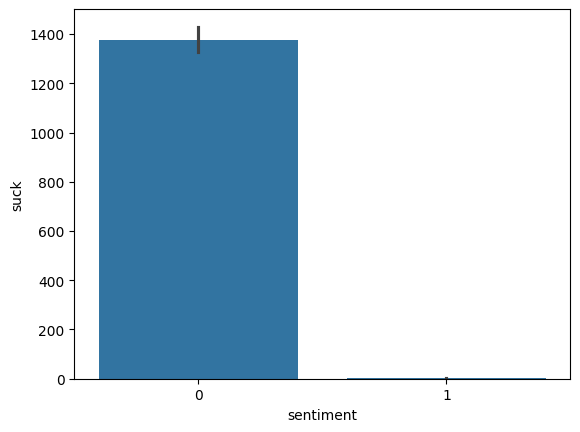

In [25]:
sns.barplot(x = 'sentiment', y = 'suck', data = train_df3, estimator = sum)
plt.show()

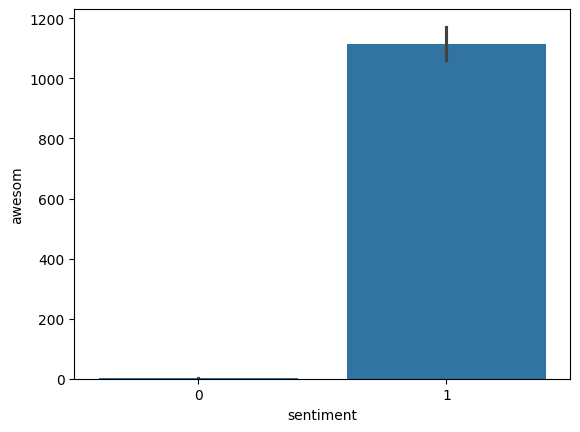

In [29]:
sns.barplot(x = 'sentiment', y = 'awesom', data = train_df3, estimator = sum)
plt.show()

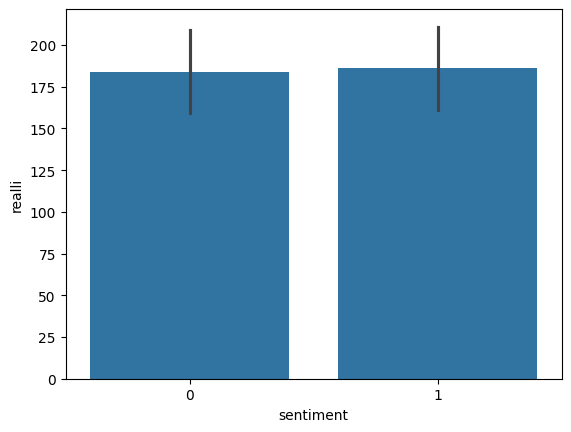

In [32]:
sns.barplot(x = 'sentiment', y = 'realli', data = train_df3, estimator = sum)
plt.show()

# Implementing Naive Bayes Model

$P(document = +ve | word = y) = ?$

$P(document = -ve | word = y) = ?$

We will be using Bernoullis Naive Bayes Model

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_df_features, train_df.sentiment, train_size = 0.3, random_state = 42)

In [34]:
from sklearn.naive_bayes import BernoulliNB

bernoulli = BernoulliNB()
bernoulli.fit(X_train, y_train)

BernoulliNB()

In [35]:
y_pred = bernoulli.predict(X_test)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2088
           1       0.98      0.99      0.99      2755

    accuracy                           0.98      4843
   macro avg       0.98      0.98      0.98      4843
weighted avg       0.98      0.98      0.98      4843



<Axes: >

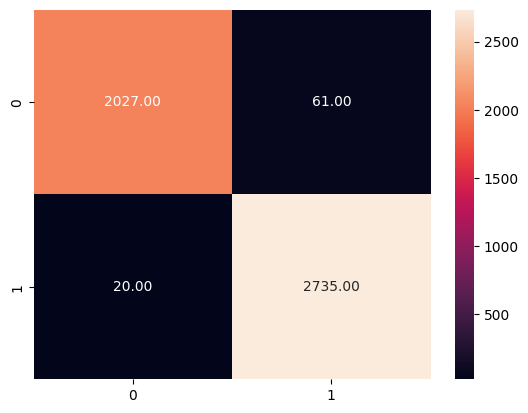

In [42]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = '.2f')